In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset (assuming the DataFrame 'df' is already loaded with 'tweet' and 'label' columns)
df = pd.read_csv("../data/mendeley_data/HateSpeechDatasetBalanced.csv")
tweets = df['Content'].values
labels = df['Label'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.2, random_state=42)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(tweets)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100, padding='post', truncating='post')
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100, padding='post', truncating='post')

# Define the BiLSTM model
model_bilstm = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_bilstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


d:\AnaConda\envs\project\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [17]:
# TF-IDF Model Definition
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from scipy.sparse import csr_matrix

vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Convert to sparse matrix representation
X_train_tfidf = csr_matrix(X_train_tfidf).astype('float32')
X_test_tfidf = csr_matrix(X_test_tfidf).astype('float32')
X_test_tfidf = X_test_tfidf.toarray().astype('float32')

# Define the TF-IDF Neural Network model
input_tfidf = Input(shape=(2000,))
x = Dense(512, activation='relu')(input_tfidf)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model_tfidf = Model(inputs=input_tfidf, outputs=output)
model_tfidf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [14]:
# Training settings
epochs = 5
batch_size = 32

# Train BiLSTM model
history_bilstm = model_bilstm.fit(X_train_seq, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)



Epoch 1/5
14523/14523 ━━━━━━━━━━━━━━━━━━━━ 1668s 114ms/step - accuracy: 0.8016 - loss: 0.4211 - val_accuracy: 0.8344 - val_loss: 0.3556
Epoch 2/5
14523/14523 ━━━━━━━━━━━━━━━━━━━━ 1685s 116ms/step - accuracy: 0.8472 - loss: 0.3366 - val_accuracy: 0.8508 - val_loss: 0.3285
Epoch 3/5
14523/14523 ━━━━━━━━━━━━━━━━━━━━ 1564s 108ms/step - accuracy: 0.8673 - loss: 0.2984 - val_accuracy: 0.8553 - val_loss: 0.3224
Epoch 4/5
14523/14523 ━━━━━━━━━━━━━━━━━━━━ 1651s 114ms/step - accuracy: 0.8826 - loss: 0.2703 - val_accuracy: 0.8586 - val_loss: 0.3184
Epoch 5/5
14523/14523 ━━━━━━━━━━━━━━━━━━━━ 1749s 120ms/step - accuracy: 0.8946 - loss: 0.2444 - val_accuracy: 0.8637 - val_loss: 0.3155


MemoryError: Unable to allocate 10.8 GiB for an array with shape (580895, 5000) and data type float32

In [18]:

# Train TF-IDF Neural Network model
history_tfidf = model_tfidf.fit(X_train_tfidf, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/5
14523/14523 ━━━━━━━━━━━━━━━━━━━━ 194s 13ms/step - accuracy: 0.7891 - loss: 0.4390 - val_accuracy: 0.8215 - val_loss: 0.3819
Epoch 2/5
14523/14523 ━━━━━━━━━━━━━━━━━━━━ 198s 14ms/step - accuracy: 0.8337 - loss: 0.3638 - val_accuracy: 0.8297 - val_loss: 0.3643
Epoch 3/5
14523/14523 ━━━━━━━━━━━━━━━━━━━━ 224s 15ms/step - accuracy: 0.8544 - loss: 0.3263 - val_accuracy: 0.8376 - val_loss: 0.3525
Epoch 4/5
14523/14523 ━━━━━━━━━━━━━━━━━━━━ 237s 16ms/step - accuracy: 0.8683 - loss: 0.3000 - val_accuracy: 0.8414 - val_loss: 0.3486
Epoch 5/5
14523/14523 ━━━━━━━━━━━━━━━━━━━━ 198s 14ms/step - accuracy: 0.8792 - loss: 0.2782 - val_accuracy: 0.8435 - val_loss: 0.3485


In [26]:
# Save the BiLSTM model
model_bilstm.save('bilstm_model.h5')
print('BiLSTM model saved as bilstm_model.h5')

# Save the TF-IDF model
model_tfidf.save('tfidf_model.h5')
print('TF-IDF model saved as tfidf_model.h5')


BiLSTM model saved as bilstm_model.h5
TF-IDF model saved as tfidf_model.h5


In [19]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test, model_type='sequential', attention_masks=None):
    if model_type == 'bert':
        y_pred_prob = model.predict([X_test, attention_masks])
    else:
        y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype("int32")

    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return cm, precision, recall, f1


In [20]:
# Evaluate BiLSTM model
cm_bilstm, precision_bilstm, recall_bilstm, f1_bilstm = evaluate_model(model_bilstm, X_test_seq, y_test)



4539/4539 ━━━━━━━━━━━━━━━━━━━━ 156s 34ms/step


In [21]:
# Evaluate TF-IDF Neural Network model
cm_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = evaluate_model(model_tfidf, X_test_tfidf, y_test)


4539/4539 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step


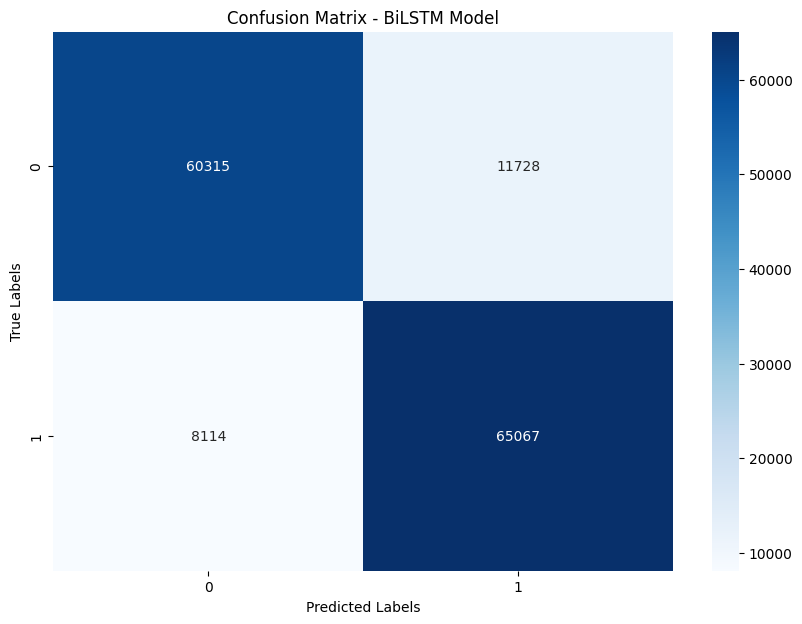

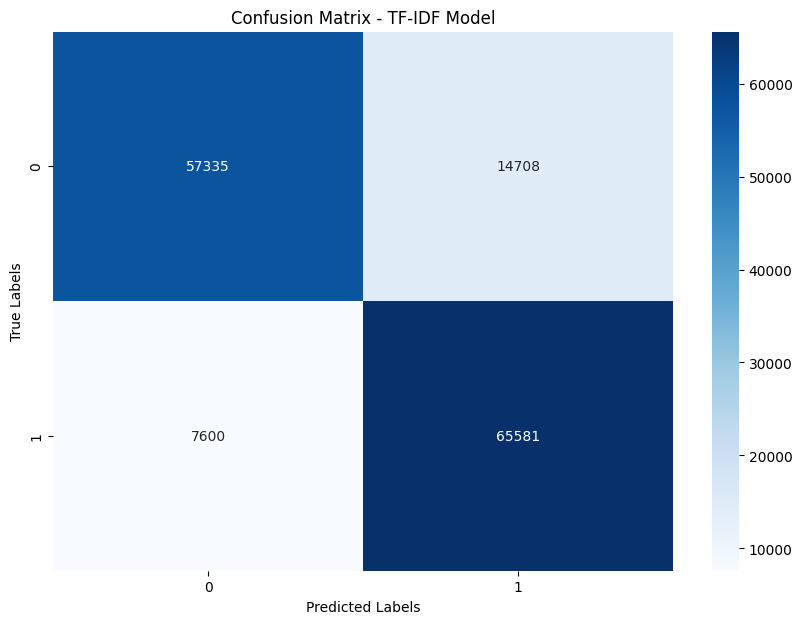

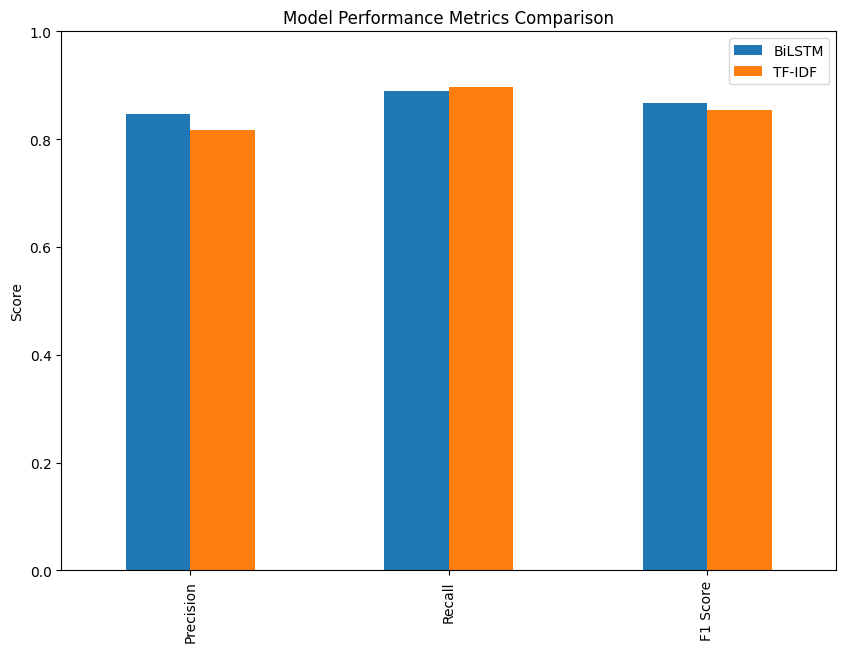

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

plot_confusion_matrix(cm_bilstm, 'Confusion Matrix - BiLSTM Model')
plot_confusion_matrix(cm_tfidf, 'Confusion Matrix - TF-IDF Model')


# Plotting precision, recall, and F1 score
metrics = {
    'BiLSTM': [precision_bilstm, recall_bilstm, f1_bilstm],
    'TF-IDF': [precision_tfidf, recall_tfidf, f1_tfidf],
}

metrics_df = pd.DataFrame(metrics, index=['Precision', 'Recall', 'F1 Score'])

metrics_df.plot(kind='bar', figsize=(10, 7))
plt.ylim(0, 1)
plt.title('Model Performance Metrics Comparison')
plt.ylabel('Score')
plt.show()
